In [1]:
#código utilizado como exemplo de sistema de recomendação para a disciplina FAM
#datasets utilizados podem ser encontrado também em https://grouplens.org/datasets/movielens/

In [2]:
import pandas as pd #biblioteca utilizada para lidar com os dataframes

In [3]:
#lendo os arquivos 
df_movies=pd.read_csv('movies.csv')
df_ratings=pd.read_csv('ratings.csv')

In [4]:
df_ratings.head() #unixtimestamp 01/01/1970

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
#analisando o dataset
#recuperando qual é o nome do filme com id = 50
print(df_movies[df_movies['movieId']==50])

    movieId                       title                  genres
46       50  Usual Suspects, The (1995)  Crime|Mystery|Thriller


In [9]:
#agrupando os dataframe para ter a junção de cada usuário e filme que viu
movie_rating=pd.merge(df_movies,df_ratings, on='movieId') #combina os dataframe por meio do id do filme

In [10]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [11]:
#analisando os dados
import matplotlib.pyplot as plt  #biblioteca utilizada para plotar gráficos ao estilo matlab
import seaborn as sns #biblioteca utilizada para plotar gráficos mais detalhados

In [12]:
#encontrando o valor médio das notas atribuídas para cada filme
movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head() # agrupa o dataframe movie_rating pela coluna titulo
#encontra a média das notas de cada filme e ordena a lista dos valores

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [13]:
#conta a quantidade de notas (rating) que cada filme recebeu
movie_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()#agrupa o dataframe movie_rating pela coluna titulo
#soma a quantidade de notas que cada filme recebeu e ordena a lista

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [14]:
#cria o dataframe que vai conter o nome de cada filme e a media das notas recebidas 
ratings = pd.DataFrame(movie_rating.groupby('title')['rating'].mean())
ratings.sort_values(by='rating',ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [15]:
#adiciona a coluna que contem a quantidade de notas que cada um dos filmes recebeu
ratings['num de avaliacoes']=pd.DataFrame(movie_rating.groupby('title')['rating'].count())
ratings.sort_values(by='num de avaliacoes',ascending=False).head()

,rating,num de avaliacoes
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [17]:
ratings.sort_values(by='rating',ascending=False).head()

,rating,num de avaliacoes
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


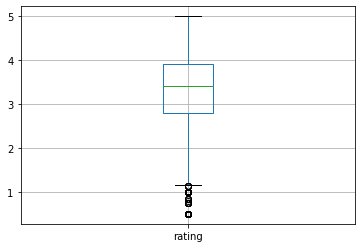

In [18]:
#analisando os dados
ratings.boxplot(column='rating');

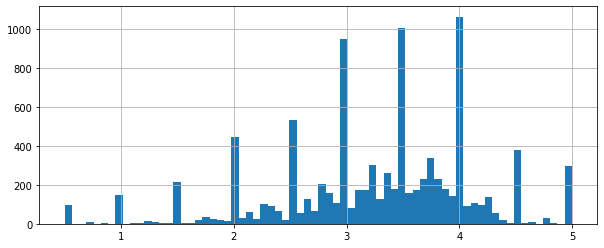

In [20]:
#analisando os dados
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70); #plota o histograma para a média das notas recebidas

In [24]:
#construção da matriz que relaciona cada usuário à nota (rating) que ele atribuiu a cada filme
movie_rating_matrix = movie_rating.pivot_table(index='userId',columns='title',values='rating')
movie_rating_matrix.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [25]:
#constroi a matriz de correlação entre cada um dos filmes 
movie_corr_matrix=movie_rating_matrix.corr()
movie_corr_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#refina a marix de correlação 
movie_corr_matrix=movie_rating_matrix.corr(method='pearson', min_periods=50)# utiliza o método de pearson para gerar a correlação 
#apenas considera as correlações entre filmes que tiveram mais de 50 avaliações
movie_corr_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
movie_corr_matrix.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Verificando o tamanho da matriz 
movie_rating_matrix.shape

(610, 9719)

In [30]:
testUser=movie_rating_matrix.iloc[600].dropna()
testUser.head(10).sort_values(ascending=False)

title
12 Angry Men (1957)         5.0
Band of Brothers (2001)     5.0
Avengers, The (2012)        4.5
Batman Begins (2005)        4.5
Big Hero 6 (2014)           4.5
2012 (2009)                 4.0
Armageddon (1998)           4.0
Avatar (2009)               4.0
Beautiful Mind, A (2001)    4.0
Blade Runner 2049 (2017)    4.0
Name: 601, dtype: float64

In [31]:
#quantidade de avaliações realizadas pelo usuário
len(testUser)

101

In [32]:
#identificando o filme de indice 2
testUser.index[2]

'Armageddon (1998)'

In [33]:
#nota atribuída pelo usuário ao filme de indice 2 (Armageddon)
testUser[2]

4.0

In [34]:
#encontrando as correlações não nulas entre o filme Armagedon
movie_corr_matrix[testUser.index[2]].dropna().sort_values(ascending=False)

title
Armageddon (1998)                                                                 1.000000
Independence Day (a.k.a. ID4) (1996)                                              0.665768
True Lies (1994)                                                                  0.547632
Star Wars: Episode I - The Phantom Menace (1999)                                  0.457663
American Pie (1999)                                                               0.430223
Men in Black (a.k.a. MIB) (1997)                                                  0.424516
Indiana Jones and the Temple of Doom (1984)                                       0.420462
Braveheart (1995)                                                                 0.414973
Saving Private Ryan (1998)                                                        0.409837
Mission: Impossible (1996)                                                        0.394391
Speed (1994)                                                                      0.

In [35]:
similarMoviesCandidates=pd.Series()
for i in range(0,len(testUser.index)):
  print("Adicionando filme similar a " +testUser.index[i]+ "...")
  #recuperando o filme que apresenta correlação
  similar=movie_corr_matrix[testUser.index[i]].dropna()
  similar=similar.map(lambda x: x* testUser[i]) #escala para 5 os filmes com maior similaridade
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
  
  
  

Adicionando filme similar a 12 Angry Men (1957)...
Adicionando filme similar a 2012 (2009)...
Adicionando filme similar a Armageddon (1998)...
Adicionando filme similar a Avatar (2009)...
Adicionando filme similar a Avengers, The (2012)...
Adicionando filme similar a Band of Brothers (2001)...
Adicionando filme similar a Batman Begins (2005)...
Adicionando filme similar a Beautiful Mind, A (2001)...
Adicionando filme similar a Big Hero 6 (2014)...
Adicionando filme similar a Blade Runner 2049 (2017)...
Adicionando filme similar a Bourne Ultimatum, The (2007)...
Adicionando filme similar a Brave (2012)...
Adicionando filme similar a Bug's Life, A (1998)...
Adicionando filme similar a Casablanca (1942)...
Adicionando filme similar a Casino Royale (2006)...
Adicionando filme similar a Catch Me If You Can (2002)...
Adicionando filme similar a City of God (Cidade de Deus) (2002)...
Adicionando filme similar a Coco (2017)...
Adicionando filme similar a Contact (1997)...
Adicionando filme sim

<ipython-input-35-c9247c3912d6>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similarMoviesCandidates=pd.Series()


In [38]:
# ordena os filmes encontrados (serie) em ordem de similaridade
similarMoviesCandidates.sort_values(inplace=True,ascending=False)
print(similarMoviesCandidates.head(15))

12 Angry Men (1957)                                          5.0
Monsters, Inc. (2001)                                        5.0
Life Is Beautiful (La Vita è bella) (1997)                   5.0
Iron Man (2008)                                              5.0
Interstellar (2014)                                          5.0
Incredibles, The (2004)                                      5.0
Inception (2010)                                             5.0
Fight Club (1999)                                            5.0
Godfather, The (1972)                                        5.0
Finding Nemo (2003)                                          5.0
Departed, The (2006)                                         5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    5.0
How to Train Your Dragon (2010)                              5.0
Lord of the Rings: The Two Towers, The (2002)                5.0
Matrix, The (1999)                                           5.0
dtype: float64


In [39]:
#como os filmes podem aparecer mais de ma vez, soma a similaridade deles
similarMoviesCandidates=similarMoviesCandidates.groupby(similarMoviesCandidates.index).sum()
similarMoviesCandidates.sort_values(inplace=True,ascending=False)
similarMoviesCandidates.head(15)

Matrix, The (1999)                                               86.143677
Inception (2010)                                                 85.205182
Lord of the Rings: The Return of the King, The (2003)            71.533869
Monsters, Inc. (2001)                                            69.753100
Saving Private Ryan (1998)                                       69.333854
Finding Nemo (2003)                                              69.224868
Fight Club (1999)                                                69.197407
Silence of the Lambs, The (1991)                                 66.731743
Batman Begins (2005)                                             65.728736
Shawshank Redemption, The (1994)                                 64.043923
Lord of the Rings: The Two Towers, The (2002)                    61.614539
Memento (2000)                                                   60.791251
Gladiator (2000)                                                 60.490376
Ocean's Eleven (2001)    

In [42]:
#encontra apenas os filmes que o usuário não assistiu
filtra_movies=similarMoviesCandidates[~similarMoviesCandidates.isin(testUser.index)]
filtra_movies.head(15)


Matrix, The (1999)                                               86.143677
Inception (2010)                                                 85.205182
Lord of the Rings: The Return of the King, The (2003)            71.533869
Monsters, Inc. (2001)                                            69.753100
Saving Private Ryan (1998)                                       69.333854
Finding Nemo (2003)                                              69.224868
Fight Club (1999)                                                69.197407
Silence of the Lambs, The (1991)                                 66.731743
Batman Begins (2005)                                             65.728736
Shawshank Redemption, The (1994)                                 64.043923
Lord of the Rings: The Two Towers, The (2002)                    61.614539
Memento (2000)                                                   60.791251
Gladiator (2000)                                                 60.490376
Ocean's Eleven (2001)    

In [41]:
filme=['12 Angry Men (1957)']
filme in list(testUser.index)

False

In [43]:
#filmes a serem recomendados
filtra_movies_recomendados=filtra_movies.sort_values(ascending=False)
filtra_movies_recomendados.head(50)

Matrix, The (1999)                                                                86.143677
Inception (2010)                                                                  85.205182
Lord of the Rings: The Return of the King, The (2003)                             71.533869
Monsters, Inc. (2001)                                                             69.753100
Saving Private Ryan (1998)                                                        69.333854
Finding Nemo (2003)                                                               69.224868
Fight Club (1999)                                                                 69.197407
Silence of the Lambs, The (1991)                                                  66.731743
Batman Begins (2005)                                                              65.728736
Shawshank Redemption, The (1994)                                                  64.043923
Lord of the Rings: The Two Towers, The (2002)                                   